In [2]:
import keras
import tensorflow as tf
import numpy as np
np.random.seed(4)
import base64, os, json, glob, re, sys
from sklearn import preprocessing
from Crypto.Cipher import AES
import pandas as pd
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16, 5)
mpl.rcParams['axes.grid'] = False
pd.options.display.max_rows = 5
%matplotlib inline  

use_keras=1
if ( use_keras):
    from keras.models import Sequential, Model
    from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate, TimeDistributed
    from keras.layers import Conv1D, GlobalMaxPool1D,Flatten, Bidirectional, RepeatVector, MaxPooling1D
    from keras.preprocessing.sequence import TimeseriesGenerator
    from keras import regularizers
    from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, Callback
    from keras import optimizers
    from keras.models import load_model
else:
    from tensorflow.keras.models import Sequential, Model
    from tensorflow.keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate, TimeDistributed
    from tensorflow.keras.layers import Conv1D, GlobalMaxPool1D,Flatten, Bidirectional, RepeatVector, MaxPooling1D
    from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
    from tensorflow.keras import regularizers
    from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, Callback
    from tensorflow.keras import optimizers
    from tensorflow.keras.models import load_model

import keras
import tensorflow as tf
import numpy as np
np.random.seed(4)
import base64, os, json, glob, re, sys
from sklearn import preprocessing
from Crypto.Cipher import AES
import pandas as pd
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16, 5)
mpl.rcParams['axes.grid'] = False
pd.options.display.max_rows = 5
%matplotlib inline  


Using TensorFlow backend.


In [15]:
file="data/stockdata_ext_prep.csv"
ltf=pd.read_csv(file)
train_count = int(len(ltf) * 0.8)
tsParams = {'length': 50, 'batch_size': 1, 'stride': 1, 'sampling_rate': 1}
predsI=['MSFT_open', 'MSFT_high', 'MSFT_low', 'MSFT_close']
predsV=['MSFT_open', 'MSFT_open_diff1']
X = ltf[predsI].values
y = ltf[predsV].values
valg    = TimeseriesGenerator(X[train_count:], y[train_count:], **tsParams )
X, y,  valg[0]
ltf

,MSFT_open,MSFT_high,MSFT_low,MSFT_close,MSFT_open_diff1
0,0.455514,0.465501,0.454196,0.453241,0.719784
1,0.446281,0.457676,0.449825,0.455776,0.668257
...,...,...,...,...,...
5207,0.978911,0.980295,0.968706,0.975339,0.684478
5208,0.957367,0.958876,0.946270,0.941746,0.599555


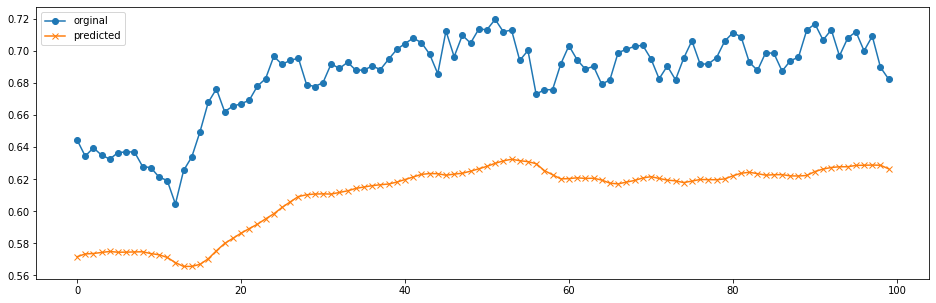

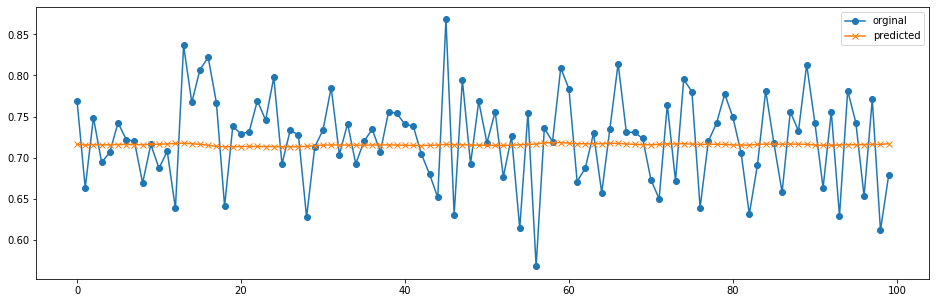

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (16, 5)
mpl.rcParams['axes.grid'] = False

model1 = load_model("stockpredictions.h5")
yp = model1.predict(valg)
#y = ndf[1:][predsV].values
yo= list(valg[0][1])
for i in range(1,len(valg)):
    yo += list(valg[i][1])
yo=np.array(yo)

f, howmany = -200, 100

plt.plot(yo[:,0][f:f + howmany], marker='o', label="orginal", )
plt.plot(yp[:,0][f:f + howmany], marker='x', label="predicted")
plt.legend()
plt.show()

plt.plot(yo[:,1][f:f + howmany], marker='o', label="orginal", )
plt.plot(yp[:,1][f:f + howmany], marker='x', label="predicted")
plt.legend()
plt.show()